Goal of this notebook: <br> To classify whether the image contains damaged or un-dmages cars.<br>
Approach: Deep learning <br>
Framework used: Tensorflow<br>

In this notebook, Densenet121 pre trained model is used to classify where the image contain the damaged car or not.

In [1]:
#import necessary librabry
import numpy as np
import pandas as pd
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
#defining the base, train and validation directory path
base_dir = '../input/car-damage-detection/data1a'
train_dir = os.path.join(base_dir, 'training')
validation_dir = os.path.join(base_dir, 'validation')

In [3]:
#defining the damage and whole , train nand validation directory
train_damage_dir = os.path.join(train_dir, '00-damage')
train_whole_dir = os.path.join(train_dir, '01-whole')
validation_damage_dir = os.path.join(validation_dir, '00-damage')
validation_whole_dir = os.path.join(validation_dir, '01-whole')

Data Augmentation is used to:
1. Rescale the data 
2. to bring all the image to same dimension  i.e. 150x150


In [4]:
#data augmentation
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  
        target_size=(150, 150), 
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 1840 images belonging to 2 classes.
Found 460 images belonging to 2 classes.


For training 1840 images are used.
For Validation 460 image are used.

Training and evaluating the model with binary crossentropy loss, accuracy, precision , recall

In [6]:
#defining model
from tensorflow.keras import Model 
from tensorflow.keras.applications import DenseNet121   

base_model = DenseNet121(input_shape = (150, 150, 3),  include_top = False, weights = 'imagenet') 

x=   tf.keras.layers.Flatten()(base_model.output)
x=   tf.keras.layers.Dense(512, activation='relu')(x) 
x=   tf.keras.layers.Dense(1, activation='sigmoid')(x) 

model= Model( base_model.input, x)

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['Accuracy','Precision','Recall'])

#training the model
history = model.fit(
      train_generator,
      epochs=15,
      validation_data=validation_generator,
      verbose=2)

2022-01-14 09:42:18.820210: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-14 09:42:18.948572: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-14 09:42:18.949257: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-14 09:42:18.950342: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

29097984/29084464 [==============================] - 0s 0us/step


/opt/conda/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
2022-01-14 09:42:23.796856: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/15


2022-01-14 09:42:41.806806: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


92/92 - 45s - loss: 0.5195 - Accuracy: 0.8446 - precision: 0.8446 - recall: 0.8446 - val_loss: 0.9514 - val_Accuracy: 0.7761 - val_precision: 0.6930 - val_recall: 0.9913
Epoch 2/15
92/92 - 14s - loss: 0.1183 - Accuracy: 0.9663 - precision: 0.9714 - recall: 0.9609 - val_loss: 0.3529 - val_Accuracy: 0.9261 - val_precision: 0.9118 - val_recall: 0.9435
Epoch 3/15
92/92 - 15s - loss: 0.0567 - Accuracy: 0.9815 - precision: 0.9815 - recall: 0.9815 - val_loss: 0.3646 - val_Accuracy: 0.9500 - val_precision: 0.9481 - val_recall: 0.9522
Epoch 4/15
92/92 - 14s - loss: 0.0781 - Accuracy: 0.9799 - precision: 0.9825 - recall: 0.9772 - val_loss: 0.4089 - val_Accuracy: 0.9239 - val_precision: 0.9621 - val_recall: 0.8826
Epoch 5/15
92/92 - 14s - loss: 0.0553 - Accuracy: 0.9848 - precision: 0.9848 - recall: 0.9848 - val_loss: 0.5410 - val_Accuracy: 0.9348 - val_precision: 0.9808 - val_recall: 0.8870
Epoch 6/15
92/92 - 14s - loss: 0.0482 - Accuracy: 0.9853 - precision: 0.9848 - recall: 0.9859 - val_loss: 

In [7]:
#weights saving
model.save("classifier.h5")

plotting the history of train and validation loss, accurcy, precision, recall

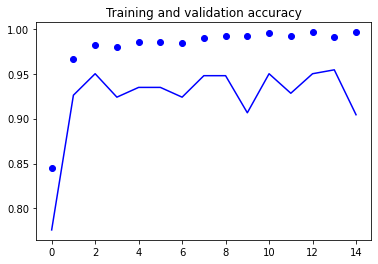

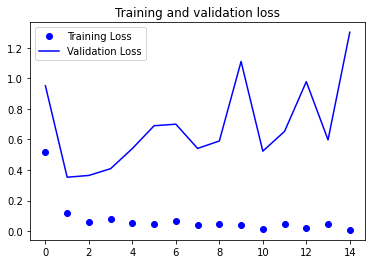

In [8]:
import matplotlib.pyplot as plt
acc = history.history['Accuracy']
val_acc = history.history['val_Accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

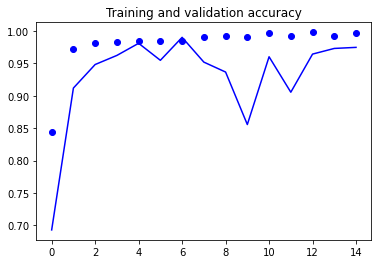

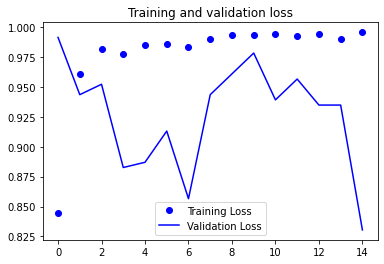

In [9]:
import matplotlib.pyplot as plt
acc = history.history['precision']
val_acc = history.history['val_precision']
loss = history.history['recall']
val_loss = history.history['val_recall']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Testing

The car is damaged


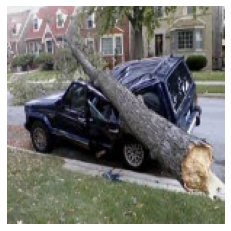

In [10]:
import cv2
im = cv2.imread("../input/car-damage-detection/data1a/validation/00-damage/0001.JPEG")
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
im = cv2.resize(im, (150, 150)) 
imS=im.reshape([1,150,150,3])
pred=model.predict(np.array(imS))
if pred[0][0]>0.5:
    print("The car is damaged")
else:
    print("The car is not damaged")
plt.axis("off")
plt.imshow(im)

[[0.]]
The car is not damaged


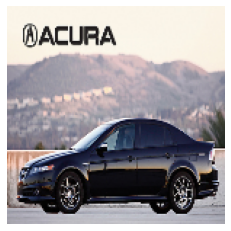

In [11]:
im = cv2.imread("../input/car-damage-detection/data1a/validation/01-whole/0006.jpg")
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
im = cv2.resize(im, (150, 150)) 
imS=im.reshape([1,150,150,3])
pred=model.predict(np.array(imS))
print(pred)
if pred[0][0]>0.5:
    print("The car is damaged")
else:
    print("The car is not damaged")
plt.axis("off")
plt.imshow(im)


Conclusion: Successfully build a classifier to classify the images containing into damage and undamage cars. 